## Part 1: Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [3]:
# Create y_df with the Attrition and Department columns

y_df = attrition_df[['Attrition', 'Department']]
y_df.head()

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


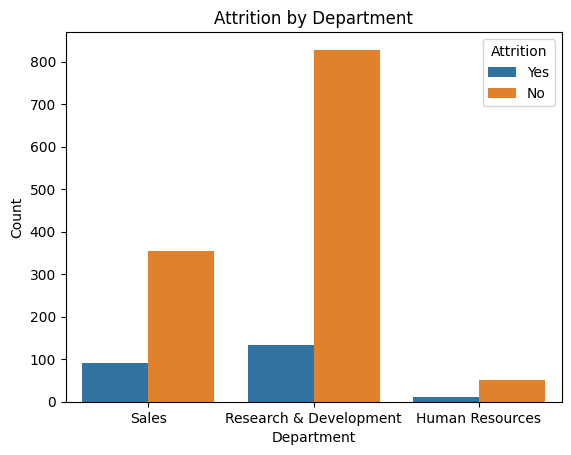

In [4]:
# @title Attrition by Department

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=y_df, x='Department', hue='Attrition')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Attrition by Department')
_ = plt.legend(title='Attrition')

In [5]:
# Create a list of at least 10 column names to use as X data
X_columns = [
    'Age',
    'PerformanceRating',
    'DistanceFromHome',
    'Education',
    'EnvironmentSatisfaction',
    'HourlyRate',
    'JobInvolvement',
    'JobLevel',
    'NumCompaniesWorked',
    'OverTime'
]


# Create X_df using your selected columns
X_df = attrition_df[X_columns].copy()

# Show the data types for X_df
X_df.dtypes


Age                         int64
PerformanceRating           int64
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
NumCompaniesWorked          int64
OverTime                   object
dtype: object

In [6]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)

In [7]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

X_df['OverTime'] = label_encoder.fit_transform(X_df['OverTime'])

print(X_df.dtypes)
X_df.head()


Age                        int64
PerformanceRating          int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
HourlyRate                 int64
JobInvolvement             int64
JobLevel                   int64
NumCompaniesWorked         int64
OverTime                   int64
dtype: object


,Age,PerformanceRating,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,NumCompaniesWorked,OverTime
0,41,3,1,2,2,94,3,2,8,1
1,49,4,8,1,3,61,2,2,1,0
2,37,3,2,2,4,92,2,1,6,1
3,33,3,3,4,4,56,3,1,1,1
4,27,3,2,1,1,40,3,1,9,0


In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)

# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training data
X_train['OverTime'] = label_encoder.fit_transform(X_train['OverTime'])

# Transform the testing data using the fitted encoder
X_test['OverTime'] = label_encoder.transform(X_test['OverTime'])

print(X_train.dtypes)
X_train.head()

# Create a StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler to the training data and testing Data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Age                        int64
PerformanceRating          int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
HourlyRate                 int64
JobInvolvement             int64
JobLevel                   int64
NumCompaniesWorked         int64
OverTime                   int64
dtype: object


In [13]:
# Create a OneHotEncoder for the Department column
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
y_df_encoded = ohc.fit_transform(y_df[["Department"]])


# Create two new variables by applying the encoder
# to the training and testing data


y_test_encoded_dept = ohc.transform(y_test[['Department']])
y_df_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [14]:
# Create a OneHotEncoder for the Attrition column
ohc = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data
y_df_encoded_att = ohc.fit_transform(y_df[["Attrition"]])

# Create two new variables by applying the encoder
# to the training and testing data
y_test_encoded_att = ohc.transform(y_test[['Attrition']])
y_df_encoded_att

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Create, Compile, and Train the Model

In [15]:
# Find the number of columns in the X training data
num_columns_X_train = X_train.shape[1]

# Create the input layer
input_layer = layers.Input(shape=(num_columns_X_train,), name='input_features')


# Create at least two shared layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)


In [16]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer


# Create the output layer
department_hidden_layer = layers.Dense(64, activation='relu')(shared_layer2)
department_output = layers.Dense(3, activation='softmax', name='department_output')(department_hidden_layer)


In [18]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer


# Create the output layer

attrition_hidden_layer = layers.Dense(32, activation='relu')(shared_layer2)

attrition_output = layers.Dense(2, activation='softmax', name='attrition_output')(attrition_hidden_layer)



In [19]:
# Create the model
model = Model(inputs=input_layer, outputs=[department_output, attrition_output])


# Compile the model
model.compile(optimizer='adam',
              loss={'department_output': 'categorical_crossentropy', 'attrition_output': 'binary_crossentropy'},
              metrics={'department_output': 'accuracy', 'attrition_output': 'accuracy'})


# Summarize the model

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 10)]                 0         []                            
 )                                                                                                
                                                                                                  
 dense (Dense)               (None, 64)                   704       ['input_features[0][0]']      
                                                                                                  
 dense_1 (Dense)             (None, 32)                   2080      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 64)                   2112      ['dense_1[0][0]']         

In [20]:
# Train the model
history = model.fit(X_df, {'department_output': y_df_encoded, 'attrition_output': y_df_encoded_att}, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
37/37 [==============================] - 2s 13ms/step - loss: 1.7493 - department_output_loss: 0.8818 - attrition_output_loss: 0.8676 - department_output_accuracy: 0.6284 - attrition_output_accuracy: 0.6777 - val_loss: 1.3196 - val_department_output_loss: 0.8893 - val_attrition_output_loss: 0.4304 - val_department_output_accuracy: 0.5986 - val_attrition_output_accuracy: 0.8537
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 1.2104 - department_output_loss: 0.7714 - attrition_output_loss: 0.4389 - department_output_accuracy: 0.6667 - attrition_output_accuracy: 0.8350 - val_loss: 1.2811 - val_department_output_loss: 0.8739 - val_attrition_output_loss: 0.4072 - val_department_output_accuracy: 0.5952 - val_attrition_output_accuracy: 0.8537
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 1.2047 - department_output_loss: 0.7729 - attrition_output_loss: 0.4318 - department_output_accuracy: 0.6650 - attrition_output_accuracy: 0.8350 - 

In [21]:
# Evaluate the model with the testing data

results = model.evaluate(X_test_scaled,
                                            {'department_output': y_test_encoded_dept,
                                             'attrition_output': y_test_encoded_att})


12/12 [==============================] - 1s 5ms/step - loss: 1.7105 - department_output_loss: 1.0219 - attrition_output_loss: 0.6886 - department_output_accuracy: 0.5190 - attrition_output_accuracy: 0.5978


In [22]:
# Print the accuracy for both department and attrition

print(f"Department predictions accuracy: {results[3]}")
print(f"Attrition predictions accuracy: {results[4]}")

Department predictions accuracy: 0.51902174949646
Attrition predictions accuracy: 0.5978260636329651


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE


## 1. Is accuracy the best metric to use on this data? Why or why not?
### Accuracy might not be the best metric, especially for the attrition prediction. If the dataset is imbalanced (e.g., if most employees don't leave), accuracy can be misleading. Metrics like F1-score, precision, recall, or AUC-ROC might be more appropriate.

## 2. What activation functions did you choose for your output layers, and why?
### For the department output, we used softmax because it's a multi-class classification problem. For the attrition output, we used sigmoid because it's a binary classification problem.

## 3. Can you name a few ways that this model could be improved?
### - Use more features or engineer new features
### - Try different architectures (e.g., deeper networks, different layer sizes)
### - Use regularization techniques to prevent overfitting
### - Try different optimizers or learning rates
### - Use techniques to handle imbalanced data if necessary
### - Perform hyperparameter tuning